In [1]:
import yfinance as yf

In [49]:
# Define the stock ticker
ticker = 'AAPL'
# Fetch historical market data
stock_data = yf.Ticker(ticker)
# Download historical data from the past 5 years at a daily interval
data = stock_data.history(start='2019-09-16', end='2024-09-16', interval='1wk')
data.to_csv('apple_stock_data.csv')
print("Data successfully downloaded and saved as apple_stock_data.csv")

Data successfully downloaded and saved as apple_stock_data.csv


In [51]:
# Setting the framework for EDA
import pandas as pd
# Read the CSV file
df = pd.read_csv('apple_stock_data.csv', index_col = 'Date', parse_dates = True)

In [53]:
# Check the first few rows
print(df.head())

                                Open       High        Low      Close  \
Date                                                                    
2019-09-16 00:00:00-04:00  52.671276  54.129999  52.608381  52.671276   
2019-09-23 00:00:00-04:00  52.966413  53.822780  52.528555  52.934967   
2019-09-30 00:00:00-04:00  53.438138  55.208928  52.042314  54.916214   
2019-10-07 00:00:00-04:00  54.737197  57.487723  54.267889  57.141792   
2019-10-14 00:00:00-04:00  56.824898  57.606273  56.413650  57.190186   

                              Volume  Dividends  Stock Splits  
Date                                                           
2019-09-16 00:00:00-04:00  569162000        0.0           0.0  
2019-09-23 00:00:00-04:00  465780800        0.0           0.0  
2019-09-30 00:00:00-04:00  634486800        0.0           0.0  
2019-10-07 00:00:00-04:00  588705600        0.0           0.0  
2019-10-14 00:00:00-04:00  422709600        0.0           0.0  


In [55]:
# Check for basic info (data types, non-null counts)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 261 entries, 2019-09-16 00:00:00-04:00 to 2024-09-09 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          261 non-null    float64
 1   High          261 non-null    float64
 2   Low           261 non-null    float64
 3   Close         261 non-null    float64
 4   Volume        261 non-null    int64  
 5   Dividends     261 non-null    float64
 6   Stock Splits  261 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 16.3+ KB
None


In [57]:
# Check for missing values
print(df.isnull().sum())

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [59]:
# Check for duplicates
print(df.duplicated().sum())

0


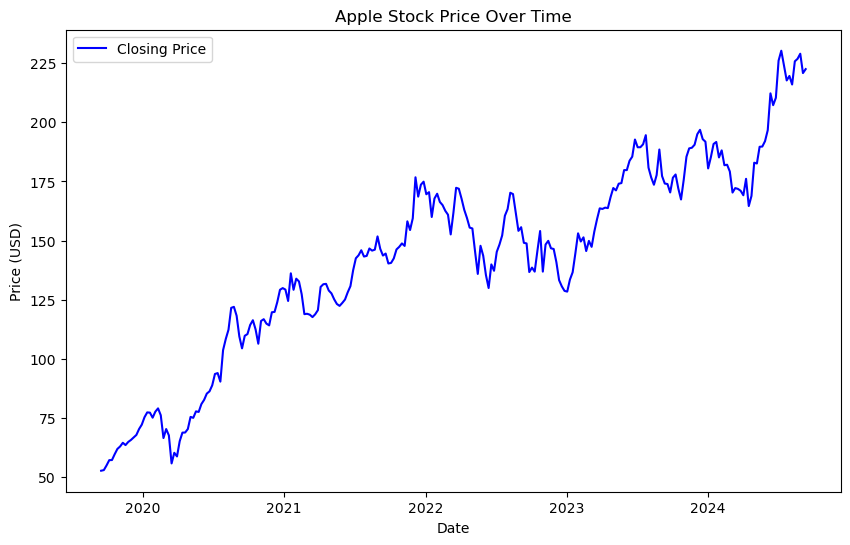

In [61]:
import matplotlib.pyplot as plt
# Plot the stock's closing prices
plt.figure(figsize=(10,6))
plt.plot(df['Close'], label = 'Closing Price', color = 'blue')
plt.title('Apple Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [63]:
import numpy as np
# Calculate log returns
df['Log Returns']= np.log(df['Close'] / df['Close'].shift(1))
# Drop any NaN values that were created by the shift
df.dropna(inplace=True)
# Display the first few rows of the log returns
df[['Close', 'Log Returns']].head()

,Close,Log Returns
Date,,
2019-09-23 00:00:00-04:00,52.934967,0.004994
2019-09-30 00:00:00-04:00,54.916214,0.036745
2019-10-07 00:00:00-04:00,57.141792,0.039727
2019-10-14 00:00:00-04:00,57.190186,0.000847
2019-10-21 00:00:00-04:00,59.650417,0.042119


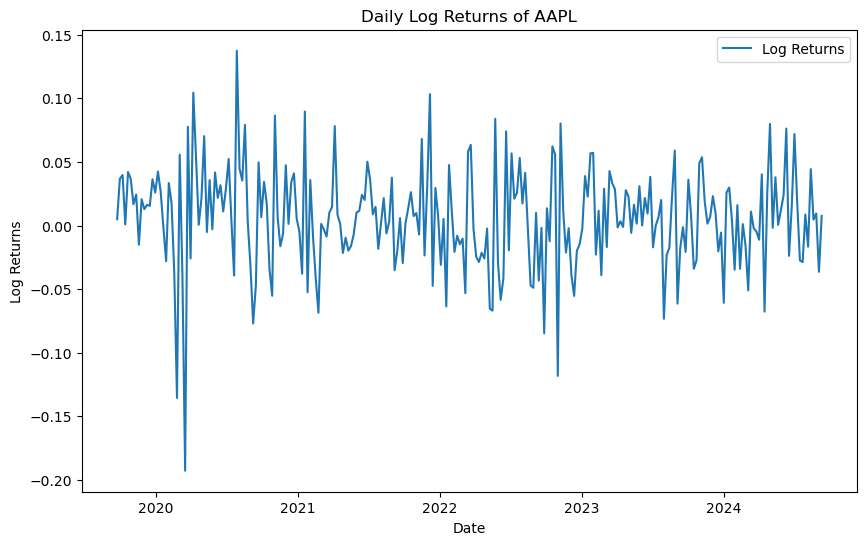

In [65]:
# Plot the log returns
plt.figure(figsize=(10,6))
plt.plot(df['Log Returns'], label='Log Returns')
plt.title('Daily Log Returns of AAPL')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.legend()
plt.show()

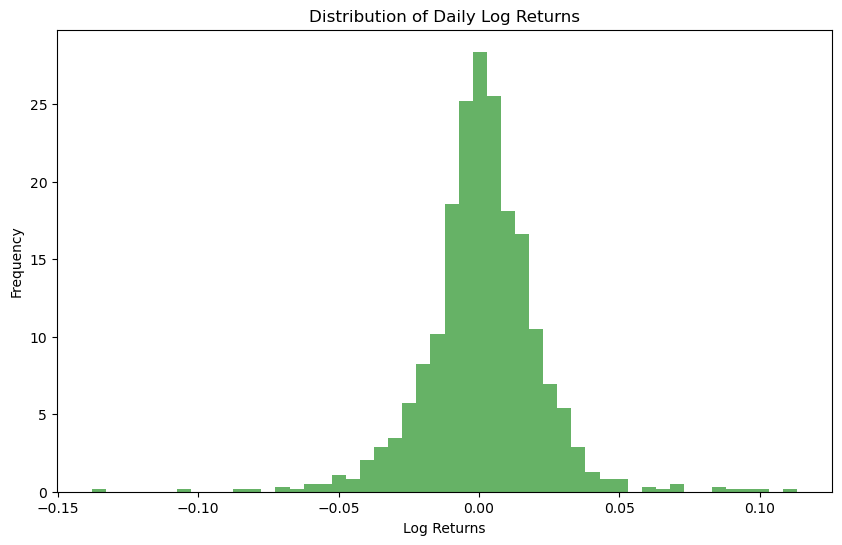

In [27]:
# Plot the histogram of log returns
plt.figure(figsize=(10,6))
plt.hist(df['Log Returns'], bins=50, density=True, alpha=0.6, color='g')

# Adding titles and labels
plt.title('Distribution of Daily Log Returns')
plt.xlabel('Log Returns')
plt.ylabel('Frequency')
plt.show()

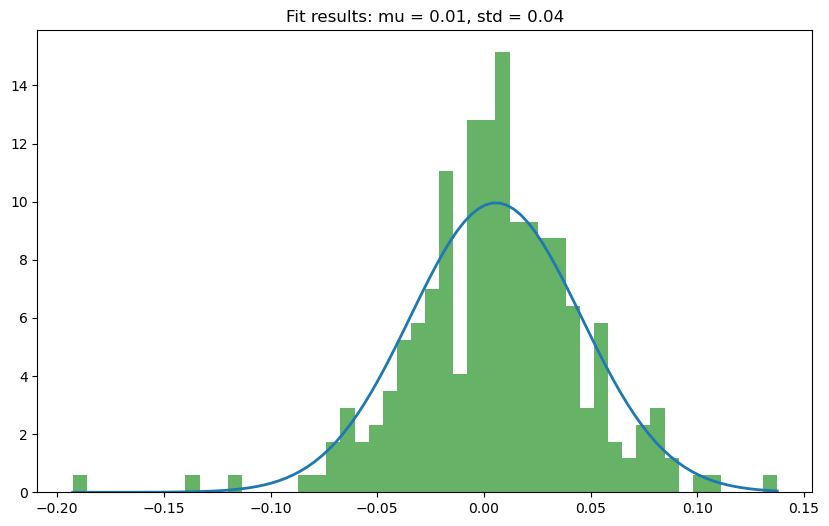

In [67]:
import scipy.stats as stats

# Fit log returns to a normal distribution
mu, std = stats.norm.fit(df['Log Returns'])

# Generate values from the fitted normal distribution
x = np.linspace(df['Log Returns'].min(), df['Log Returns'].max(), 100)
p = stats.norm.pdf(x, mu, std)

# Plot the histogram and the fitted distribution
plt.figure(figsize=(10,6))
plt.hist(df['Log Returns'], bins=50, density=True, alpha=0.6, color='g')
plt.plot(x, p, linewidth=2)
plt.title(f'Fit results: mu = {mu:.2f}, std = {std:.2f}')
plt.show()

In [83]:
# Perform the Chi-Square Goodness of Fit test
observed_freq, bins = np.histogram(df['Log Returns'], bins=50, density=True)

# Calculate the expected frequencies using the normal distribution PDF
bin_centers = 0.5 * (bins[1:] + bins[:-1])
expected_freq = stats.norm.pdf(bin_centers, mu, std) * len(df['Log Returns']) * np.diff(bins)

# Scale the expected frequencies to match the observed frequencies
expected_freq *= observed_freq.sum()/expected_freq.sum()

# Perform chi-square test
chi_square_stat, p_value = stats.chisquare(observed_freq, expected_freq)

print(f"Chi-Square Statistic: {chi_square_stat}, p-value: {p_value}")

Chi-Square Statistic: 4845.657856521145, p-value: 0.0


In [85]:
# Perform the KS test before outliers were capped 
ks_stat, p_value = stats.kstest(df['Log Returns'], 'norm', args=(mu, std))
print(f"KS Statistic: {ks_stat}, p-value: {p_value}")

KS Statistic: 0.058164615787033025, p-value: 0.3298268921238542
